## 設定基本套件與環境

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tej_key
tej_key = 'JPMkOoVydLtQgTaryZQGT3py0WLruo'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key 
os.environ['TEJAPI_BASE'] = api_base

In [6]:
## 使用 get_universe() 函式取得股票池
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2023-01-03', 
                    end = '2023-01-03',  # 選取 2023 年年初已上市的股票
                    mkt_bd_e = 'TSE',  # 填入：上市一般版股票(不含創新版)
                    stktp_e = 'Common Stock',  # 填入：普通股股票 
                    main_ind_e = 'General Industry') # general industry 篩掉金融產業
pool

Currently used TEJ API key call quota 203/1000 (20.3%)
Currently used TEJ API key data quota 2259979/10000000 (22.6%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 

In [7]:
## 利用 TejToolAPI 抓取所需的財務資料
import TejToolAPI

start_time = pd.Timestamp('2022-01-01')
end_time = pd.Timestamp('2023-12-29')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['本益比','非流動負債合計','股東權益總計','營運產生現金流量','總股本(仟元)','稅後淨利成長率','投資產生現金流量','融資產生現金流量'],
                                   transfer_to_chinese = True)
data

Currently used TEJ API key call quota 296/1000 (29.6%)
Currently used TEJ API key data quota 3335504/10000000 (33.36%)


,股票代碼,日期,本益比,融資產生現金流量_A,營運產生現金流量_A,投資產生現金流量_A,股東權益總計_A,非流動負債合計_A,稅後淨利成長率_A,總股本(仟元)
0,1101,2022-01-03,14.00,1326492.0,12393450.0,-4913382.0,220920689.0,106954607.0,-21.57,61252340.0
1,1102,2022-01-03,10.22,662824.0,9631090.0,-2314823.0,174239118.0,76015970.0,0.08,35455721.0
2,1103,2022-01-03,7.11,-1584830.0,-224370.0,1852027.0,26980103.0,11760713.0,14.58,NaN
3,1104,2022-01-03,12.87,-724492.0,1159443.0,-302950.0,18995405.0,1491027.0,-14.98,NaN
4,1108,2022-01-03,19.74,-1409.0,257749.0,-254110.0,4547203.0,766549.0,-48.31,NaN
...,...,...,...,...,...,...,...,...,...,...
415398,9944,2023-12-29,6.05,4785.0,57256.0,-61247.0,3636900.0,1079712.0,197.23,NaN
415399,9945,2023-12-29,18.15,-3691712.0,1219026.0,-432327.0,91714441.0,44133601.0,-21.74,28442251.0
415400,9946,2023-12-29,120.00,-197387.0,-432835.0,105625.0,6379966.0,2601433.0,-86.40,3265542.0
415401,9955,2023-12-29,NaN,66929.0,38854.0,-214668.0,1342462.0,785288.0,-23.16,NaN


## 選股條件一

In [8]:
# 條件一
# 取出最近年度(2023-12-29)的資料
data_last_1Y = data[data['日期'] == '2023-12-29'].reset_index(drop = True)  

# 取出股票基本資料與本益比資料方便觀察
PE_1Y_data = data_last_1Y[['股票代碼', '日期', '本益比']]

PE_1Y_data

,股票代碼,日期,本益比
0,1101,2023-12-29,29.53
1,1102,2023-12-29,14.44
2,1103,2023-12-29,73.27
3,1104,2023-12-29,8.87
4,1108,2023-12-29,8.59
...,...,...,...
854,9944,2023-12-29,6.05
855,9945,2023-12-29,18.15
856,9946,2023-12-29,120.00
857,9955,2023-12-29,NaN


In [9]:
# 依不同產業分類，計算出平均本益比
# 填入：欲進行分類的財務科目
PE_ave = PE_1Y_data.groupby('股票代碼')['本益比'].transform('mean') 

# 加入 '平均本益比' 欄位
PE_1Y_data['平均本益比'] = PE_ave
 
PE_1Y_data

,股票代碼,日期,本益比,平均本益比
0,1101,2023-12-29,29.53,29.53
1,1102,2023-12-29,14.44,14.44
2,1103,2023-12-29,73.27,73.27
3,1104,2023-12-29,8.87,8.87
4,1108,2023-12-29,8.59,8.59
...,...,...,...,...
854,9944,2023-12-29,6.05,6.05
855,9945,2023-12-29,18.15,18.15
856,9946,2023-12-29,120.00,120.00
857,9955,2023-12-29,NaN,NaN


In [10]:
set_1 = set(PE_1Y_data[PE_1Y_data['平均本益比'] <= 10]['股票代碼'])  # 篩選符合選股條件的公司
set_1

{'1104',
 '1108',
 '1218',
 '1310',
 '1312',
 '1313',
 '1314',
 '1438',
 '1568',
 '1609',
 '1808',
 '1909',
 '2008',
 '2014',
 '2025',
 '2303',
 '2305',
 '2387',
 '2390',
 '2409',
 '2443',
 '2488',
 '2489',
 '2506',
 '2520',
 '2534',
 '2535',
 '2546',
 '2603',
 '2609',
 '2615',
 '2617',
 '2618',
 '2636',
 '2702',
 '2905',
 '3022',
 '3056',
 '3308',
 '3312',
 '3432',
 '3481',
 '3708',
 '4930',
 '5525',
 '5533',
 '6116',
 '6128',
 '6414',
 '6670',
 '8101',
 '8163',
 '8201',
 '9906',
 '9919',
 '9944'}

In [11]:
len(set_1)

56

## 選股條件二

In [12]:
# 條件2
# 計算長期負債/所有者權益
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

r_1Y_data = data1_last_1Y[['股票代碼', '日期', '非流動負債合計_A','股東權益總計_A']]

r_1Y_data

,股票代碼,日期,非流動負債合計_A,股東權益總計_A
0,1101,2023-12-29,133852417.0,244726491.0
1,1102,2023-12-29,59799527.0,191706450.0
2,1103,2023-12-29,10448346.0,21993122.0
3,1104,2023-12-29,1658900.0,22777981.0
4,1108,2023-12-29,1680821.0,5004310.0
...,...,...,...,...
854,9944,2023-12-29,1079712.0,3636900.0
855,9945,2023-12-29,44133601.0,91714441.0
856,9946,2023-12-29,2601433.0,6379966.0
857,9955,2023-12-29,785288.0,1342462.0


In [10]:
#計算企業平均非流動負債
Loan_ave = r_1Y_data.groupby('股票代碼')['非流動負債合計_A'].transform('mean')
#計算企業平均所有者權益
Equity_ave=r_1Y_data.groupby('股票代碼')['股東權益總計_A'].transform('mean')

r_1Y_data['長期負債/所有者權益'] = Loan_ave/Equity_ave
r_1Y_data

,股票代碼,日期,非流動負債合計_A,股東權益總計_A,長期負債/所有者權益
0,1101,2023-12-29,133852417.0,244726491.0,0.546947
1,1102,2023-12-29,59799527.0,191706450.0,0.311933
2,1103,2023-12-29,10448346.0,21993122.0,0.475073
3,1104,2023-12-29,1658900.0,22777981.0,0.072829
4,1108,2023-12-29,1680821.0,5004310.0,0.335875
...,...,...,...,...,...
854,9944,2023-12-29,1079712.0,3636900.0,0.296877
855,9945,2023-12-29,44133601.0,91714441.0,0.481207
856,9946,2023-12-29,2601433.0,6379966.0,0.407750
857,9955,2023-12-29,785288.0,1342462.0,0.584961


In [15]:
set_2 = set(r_1Y_data[r_1Y_data['長期負債/所有者權益'] <= 1/3]['股票代碼'])  # 篩選符合選股條件的公司
set_2

KeyError: '長期負債/所有者權益'

In [ ]:
len(set_2)

## 選股條件三

In [ ]:
#條件3
#計算每股經營淨現金流量
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

CashFlow_1Y_data = data1_last_1Y[['股票代碼', '日期', '總股本(仟元)','營運產生現金流量_A','投資產生現金流量_A','融資產生現金流量_A']]

CashFlow_1Y_data

In [14]:
#計算企業平均流通在外股數
Stock_ave = CashFlow_1Y_data.groupby('股票代碼')['總股本(仟元)'].transform('mean')*100
#計算企業平均營運產生現金流量
OCF_ave=CashFlow_1Y_data.groupby('股票代碼')['營運產生現金流量_A'].transform('mean')
#計算企業平均投資產生現金流量
ICF_ave=CashFlow_1Y_data.groupby('股票代碼')['投資產生現金流量_A'].transform('mean')
#計算企業平均融資產生現金流量
FCF_ave=CashFlow_1Y_data.groupby('股票代碼')['融資產生現金流量_A'].transform('mean')

CashFlow_1Y_data['每股經營淨現金流量'] = (OCF_ave-ICF_ave+FCF_ave)/Stock_ave

CashFlow_1Y_data

,股票代碼,日期,總股本(仟元),營運產生現金流量_A,投資產生現金流量_A,融資產生現金流量_A,每股經營淨現金流量
0,1101,2023-12-29,75511817.0,19954188.0,-31530951.0,-6689946.0,0.005932
1,1102,2023-12-29,35465629.0,3933530.0,-5975323.0,-4169621.0,0.001618
2,1103,2023-12-29,7902475.0,-159141.0,-1875415.0,-189487.0,0.001932
3,1104,2023-12-29,6732175.0,1340510.0,1121339.0,-1713091.0,-0.002219
4,1108,2023-12-29,NaN,498511.0,-97625.0,-384053.0,NaN
...,...,...,...,...,...,...,...
854,9944,2023-12-29,NaN,57256.0,-61247.0,4785.0,NaN
855,9945,2023-12-29,28442251.0,1219026.0,-432327.0,-3691712.0,-0.000717
856,9946,2023-12-29,3265542.0,-432835.0,105625.0,-197387.0,-0.002253
857,9955,2023-12-29,NaN,38854.0,-214668.0,66929.0,NaN


In [ ]:
set_3 = set(CashFlow_1Y_data[CashFlow_1Y_data['每股經營淨現金流量'] > 0]['股票代碼'])  # 篩選符合選股條件的公司
set_3

In [ ]:
len(set_3)

## 選股條件四

In [ ]:
#條件4
#計算每股經營淨現金流量
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

growth_NI_1Y_data = data1_last_1Y[['股票代碼', '日期', '稅後淨利成長率_A']]
growth_NI_1Y_data

In [ ]:
# 依不同產業分類，計算出平均本益比
# 填入：欲進行分類的財務科目
growth_NI_ave = growth_NI_1Y_data.groupby('股票代碼')['稅後淨利成長率_A'].transform('mean') 

# 加入 '平均本益比' 欄位
growth_NI_1Y_data['平均稅後淨利成長率']=growth_NI_ave
 
growth_NI_1Y_data

In [ ]:
set_4 = set(growth_NI_1Y_data[growth_NI_1Y_data['平均稅後淨利成長率'] > 20]['股票代碼'])  # 篩選符合選股條件的公司
set_4

In [ ]:
len(set_4)

## 整合每間公司符合哪些選股條件

In [ ]:
company_list = data['股票代碼'].unique().tolist()
coid = {'公司代碼': company_list}

data_combine = pd.DataFrame(coid)
data_combine['選股條件 1'] = data_combine['公司代碼'].isin(set_1)
data_combine['選股條件 2'] = data_combine['公司代碼'].isin(set_2)
data_combine['選股條件 3'] = data_combine['公司代碼'].isin(set_3)
data_combine['選股條件 4'] = data_combine['公司代碼'].isin(set_4)
data_combine['符合條件數量'] = data_combine.iloc[:, 1:5].sum(axis = 1)

data_combine

## 取出符合所有條件的股票

In [ ]:
tickers = list(set_1 & set_2 & set_3 & set_4)
tickers

In [ ]:
len(tickers)

In [ ]:
import TejToolAPI

start_time = pd.Timestamp('2022-01-01')
end_time = pd.Timestamp('2023-12-29')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = tickers,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['資料日','開盤價','最高價','最低價','收盤價'],
                                   transfer_to_chinese = True)
data

## 取出個別標的公司股價資料

In [ ]:
# 取出根基公司(建材營造)股價資料
data_2546 = data[data['股票代碼'].isin(['2546'])].reset_index(drop = True)
data_2546 = data_2546.drop(columns = '股票代碼')
data_2546['日期'] = pd.to_datetime(data_2546['日期'])
data_2546 = pd.DataFrame(data_2546).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_2546

In [53]:
data_2546.to_csv('data_2546.csv')

In [ ]:
# 取出上緯投控公司股價資料
data_3708 = data[data['股票代碼'].isin(['3708'])].reset_index(drop = True)
data_3708 = data_3708.drop(columns = '股票代碼')
data_3708['日期'] = pd.to_datetime(data_3708['日期'])
data_3708 = pd.DataFrame(data_3708).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_3708

In [55]:
data_3708.to_csv('data_3708.csv')

In [ ]:
# 取出樺漢公司(電腦/周邊設備)股價資料
data_6414 = data[data['股票代碼'].isin(['6414'])].reset_index(drop = True)
data_6414 = data_6414.drop(columns = '股票代碼')
data_6414['日期'] = pd.to_datetime(data_6414['日期'])
data_6414 = pd.DataFrame(data_6414).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_6414

In [57]:
data_6414.to_csv('data_6414.csv')

## 斐波那契回調 & 移動平均線

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_2546 = pd.read_csv('data_2546.csv') # 載入股價資料
df_3708 = pd.read_csv('data_3708.csv')
df_6414 = pd.read_csv('data_6414.csv')

In [2]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_2546, length):
    df_2546['PivotHigh'] = df_2546['High'].rolling(window=length, center=True).max()
    df_2546['PivotLow'] = df_2546['Low'].rolling(window=length, center=True).min()
    df_2546['PivotHigh'] = df_2546.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_2546['PivotLow'] = df_2546.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_2546

In [ ]:
def plot_fibonacci_levels(df_2546, length, show_zero_and_half):
    df_2546 = calculate_pivots(df_2546, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_2546['Date']):
        df_2546['Date'] = pd.to_datetime(df_2546['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_2546['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_2546['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_2546.loc[df_2546['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_2546.loc[df_2546['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_2546.loc[df_2546['PivotHigh'].dropna().index[-1], 'Date'] > df_2546.loc[df_3708['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_2546.loc[df_2546['PivotHigh'].dropna().index[-1], 'Date'] - df_2546.loc[df_2546['PivotLow'].dropna().index[-1], 'Date']).days)
    df_2546['MA'] = df_2546['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_2546['Close'] >= df_2546['MA']) & (df_2546['Close'] >= fib_0_5) & (df_2546['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_2546['Close'] < df_2546['MA']) & (df_2546['Close'] >= fib_0_382) & (df_2546['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_2546['Close'] < df_2546['MA']) & (df_2546['Close'] >= fib_0_5) & (df_2546['Close'] < fib_0_618)


    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_2546['Date'], df_2546['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_2546['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_2546['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_2546['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_2546['Date'], df_2546['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_2546['Date'], df_2546['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

MA in Fibonacci 0.5 to 0.618 range:
 Empty DataFrame
Columns: [Unnamed: 0, Date, Close, Open, High, Low, PivotHigh, PivotLow, MA]
Index: []


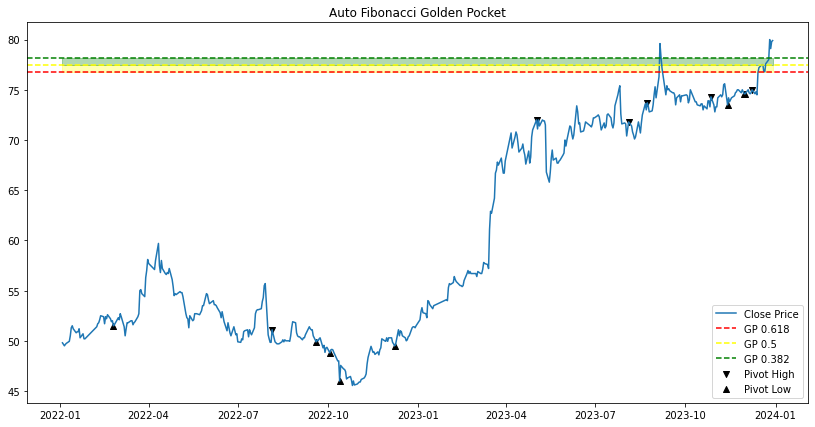

In [80]:
# 顯示圖形
plot_fibonacci_levels(df_2546, length=5, show_zero_and_half=True)

In [3]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_3708, length):
    df_3708['PivotHigh'] = df_3708['High'].rolling(window=length, center=True).max()
    df_3708['PivotLow'] = df_3708['Low'].rolling(window=length, center=True).min()
    df_3708['PivotHigh'] = df_3708.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_3708['PivotLow'] = df_3708.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_3708

In [4]:
def plot_fibonacci_levels(df_3708, length, show_zero_and_half):
    df_3708 = calculate_pivots(df_3708, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_3708['Date']):
        df_3708['Date'] = pd.to_datetime(df_3708['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_3708['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_3708['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_3708.loc[df_3708['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_3708.loc[df_3708['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_3708.loc[df_3708['PivotHigh'].dropna().index[-1], 'Date'] > df_3708.loc[df_3708['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_3708.loc[df_3708['PivotHigh'].dropna().index[-1], 'Date'] - df_3708.loc[df_3708['PivotLow'].dropna().index[-1], 'Date']).days)
    df_3708['MA'] = df_3708['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_3708['Close'] >= df_3708['MA']) & (df_3708['Close'] >= fib_0_5) & (df_3708['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_3708['Close'] < df_3708['MA']) & (df_3708['Close'] >= fib_0_382) & (df_3708['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_3708['Close'] < df_3708['MA']) & (df_3708['Close'] >= fib_0_5) & (df_3708['Close'] < fib_0_618)


    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_3708['Date'], df_3708['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_3708['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_3708['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_3708['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_3708['Date'], df_3708['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_3708['Date'], df_3708['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

In [91]:
# 顯示圖形
plot_fibonacci_levels(df_3708, length=5, show_zero_and_half=True)

IndexError: single positional indexer is out-of-bounds

In [16]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_6414, length):
    df_6414['PivotHigh'] = df_6414['High'].rolling(window=length, center=True).max()
    df_6414['PivotLow'] = df_6414['Low'].rolling(window=length, center=True).min()
    df_6414['PivotHigh'] = df_6414.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_6414['PivotLow'] = df_6414.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_3708

In [17]:
def plot_fibonacci_levels(df_6414, length, show_zero_and_half):
    df_6414 = calculate_pivots(df_6414, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_6414['Date']):
        df_6414['Date'] = pd.to_datetime(df_6414['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_6414['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_6414['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_6414.loc[df_6414['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_6414.loc[df_6414['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_6414.loc[df_6414['PivotHigh'].dropna().index[-1], 'Date'] >df_6414.loc[df_6414['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_6414.loc[df_6414['PivotHigh'].dropna().index[-1], 'Date'] - df_6414.loc[df_6414['PivotLow'].dropna().index[-1], 'Date']).days)
    df_6414['MA'] = df_6414['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_6414['Close'] >= df_6414['MA']) & (df_6414['Close'] >= fib_0_5) & (df_6414['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_6414['Close'] < df_6414['MA']) & (df_6414['Close'] >= fib_0_382) & (df_6414['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_6414['Close'] < df_6414['MA']) & (df_6414['Close'] >= fib_0_5) & (df_6414['Close'] < fib_0_618)


    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_6414['Date'], df_6414['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_6414['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_6414['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_6414['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_6414['Date'], df_6414['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_6414['Date'], df_6414['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

In [18]:
# 顯示圖形
plot_fibonacci_levels(df_6414, length=5, show_zero_and_half=True)

KeyError: 'PivotHigh'